In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import re

from simulations.global_chi2_cpm import get_expected_counts
from plot_utils.abundance_grouped_heatmaps import add_ticks

In [2]:
base_relative_abundances = [1e-4, 1e-3, 1e-2]

relative_abundances = [relative_abundance * number
                       for relative_abundance 
                       in base_relative_abundances
                       for number in (1,2,5) 
                       for repeat in range(10)]

relative_abundances += [1-sum(relative_abundances)]
frequencies = np.array(relative_abundances)

rate = 2

number_droplets = int(15e6)

In [3]:
expected_counts = get_expected_counts(number_droplets, frequencies)[1]
        
# this line is annoying but important
expected_counts = expected_counts.reshape((1,*expected_counts.shape))

In [4]:
def get_avg_grouped_pct_diffs(difference_vectors):
    """Changed relative to version for picky_diffs where shape of array is different"""
    # expected counts is a global variable -- very naughty of me to do this...  
    relevant_pct_diffs = difference_vectors / (expected_counts + (expected_counts == 0).astype(float))
    
    grouped_pct_diffs = {}
    for i in range(9):
        for j in range(i,9):
            if i != j:
                grouped_pct_diffs[i,j] = relevant_pct_diffs[:,i*10:(i+1)*10,j*10:(j+1)*10]
            elif i == j:
                grouped_pct_diffs[i,j] = np.array([])
                for simulation_number in range(500):
                    grouped_pct_diffs[i,j] = np.append(grouped_pct_diffs[i,j], relevant_pct_diffs[simulation_number,...][i*10:(i+1)*10,j*10:(j+1)*10][np.triu_indices(10, k=0)])

    avg_grouped_pct_diffs = np.zeros((9,9))
    for k in range(9):
        for l in range(k,9):
            avg_grouped_pct_diffs[k,l] = np.mean(grouped_pct_diffs[k,l])
    return avg_grouped_pct_diffs

In [5]:
hTPMH = np.load('catpaw_mahjong/picky_observed_differences_from_expected.npz')['picky_group_diffs']
hPoDM_100 = np.load('CPDM_100/picky_observed_differences_from_expected.npz')['picky_group_diffs']
hNBDM_100 = np.load('CNBDM_100/picky_observed_differences_from_expected.npz')['picky_group_diffs']
hPoDM_1 = np.load('CPDM/picky_observed_differences_from_expected.npz')['picky_group_diffs']
hNBDM_1 = np.load('CNBDM/picky_observed_differences_from_expected.npz')['picky_group_diffs']
hExhPoDM = np.load('CECPDM/picky_observed_differences_from_expected.npz')['picky_group_diffs']
hExhNBDM = np.load('CECNBDM/picky_observed_differences_from_expected.npz')['picky_group_diffs']

In [6]:
hTPMH.shape

(500, 91, 91)

In [7]:
def plot_stuff(stuff, title):
    
    plt.figure(figsize=(12,9))

    ax = sns.heatmap(stuff, square=True, linewidths=2, linecolor='white',
                     mask=np.tril(np.ones((9,9)).astype(bool), k=-1),
                    cmap='icefire_r', cbar_kws={'pad':0.15}, vmin=-0.105, vmax=0.105)
    ax.yaxis.tick_right()
    ax.xaxis.tick_top()
    add_ticks(ax.xaxis)
    add_ticks(ax.yaxis)
    ax.set_xlabel("Relative Abundance of Strain", fontsize=14, labelpad=15, weight="bold")
    ax.xaxis.set_label_position("top")
    ax.set_ylabel("Relative Abundance of Strain", fontsize=14, labelpad=20, weight="bold",
                 rotation=-90)
    ax.yaxis.set_label_position("right")
    
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
    
    cbar.ax.set_ylabel('Average % Change Relative to Expected Count', rotation=-90, 
                       fontsize=16, labelpad=20, weight="bold")

    plt.suptitle(title, fontsize=24)
    file_title = title.replace(' ', '_')
    file_title = re.sub('[^A-Za-z0-9_]+', '', file_title)
    # turn multiple underscores, e.g. resulting from a ' - ', into one
    file_title = re.sub('_[_]+', '_', file_title)
    file_title = '{}.png'.format(file_title)
    plt.savefig(file_title, bbox_inches = "tight")

In [8]:
## difference 0
def plot_stuff_preprint(stuff, title, fontsize=24):
    
    plt.figure(figsize=(12,9))

    ax = sns.heatmap(stuff, square=True, linewidths=2, linecolor='white',
                     mask=np.tril(np.ones((9,9)).astype(bool), k=-1),
                    cmap='icefire_r', cbar_kws={'pad':0.15}, vmin=-0.105, vmax=0.105)
    ax.yaxis.tick_right()
    ax.xaxis.tick_top()
    add_ticks(ax.xaxis)
    add_ticks(ax.yaxis)
## difference 1
    ax.set_xlabel("Relative Abundance of Type", fontsize=14, labelpad=15, weight="bold")
    ax.xaxis.set_label_position("top")
## difference 2
    ax.set_ylabel("Relative Abundance of Type", fontsize=14, labelpad=20, weight="bold",
                 rotation=-90)
    ax.yaxis.set_label_position("right")
    
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
## difference 3    
    cbar.ax.set_ylabel('Average % Change Relative to hPoMu Expected Count', rotation=-90, 
                       fontsize=16, labelpad=20, weight="bold")
## difference 4
    plt.suptitle(title, fontsize=fontsize)
    file_title = title.replace(' ', '_')
    file_title = re.sub('[^A-Za-z0-9_]+', '', file_title)
    # turn multiple underscores, e.g. resulting from a ' - ', into one
    file_title = re.sub('_[_]+', '_', file_title)
    file_title = '{}.png'.format(file_title)
    plt.savefig(file_title, bbox_inches = "tight")

## hTPMH

In [9]:
avg_grouped_hTPMH_pct_diffs = get_avg_grouped_pct_diffs(hTPMH)

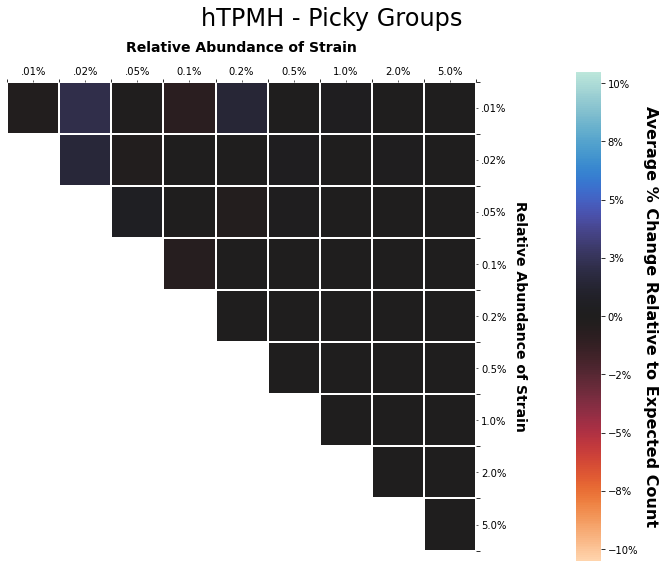

In [10]:
plot_stuff(avg_grouped_hTPMH_pct_diffs, 'hTPMH - Picky Groups')

## hNBDM $\zeta=100$

In [11]:
avg_grouped_hNBDM_100_pct_diffs = get_avg_grouped_pct_diffs(hNBDM_100)

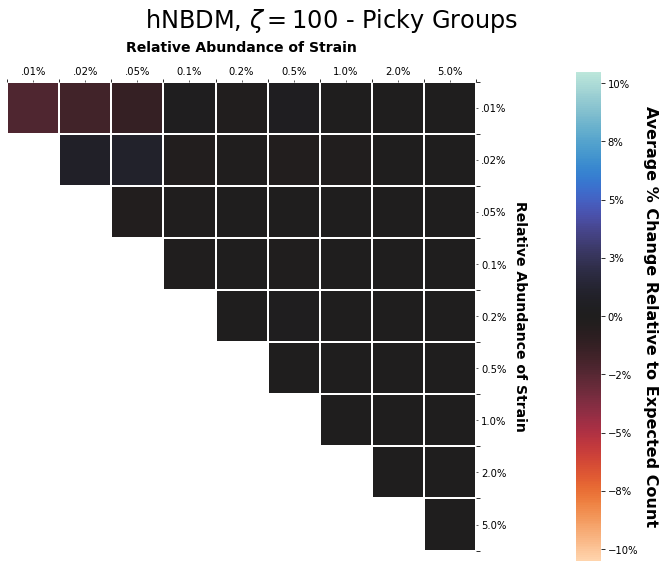

In [12]:
plot_stuff(avg_grouped_hNBDM_100_pct_diffs, 'hNBDM, $\zeta=100$ - Picky Groups')

## hPoDM $\zeta_C=100$

In [13]:
avg_grouped_hPoDM_100_pct_diffs = get_avg_grouped_pct_diffs(hPoDM_100)

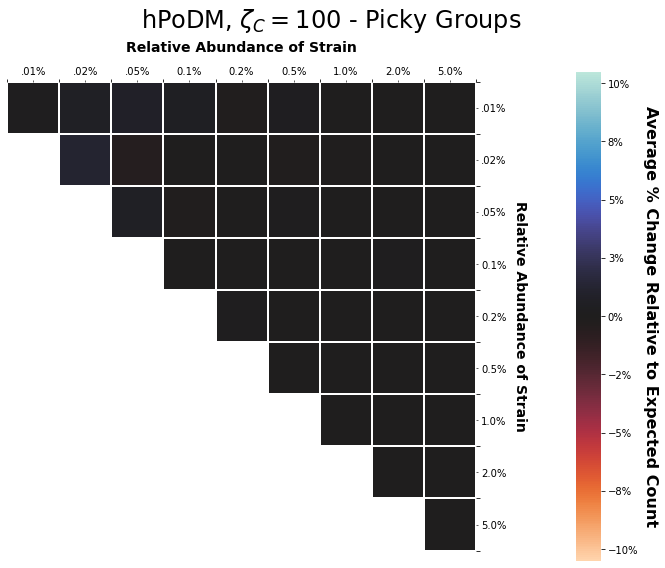

In [14]:
plot_stuff(avg_grouped_hPoDM_100_pct_diffs, 'hPoDM, $\zeta_C=100$ - Picky Groups')

## hNBDM $\zeta=1$

In [15]:
avg_grouped_hNBDM_1_pct_diffs = get_avg_grouped_pct_diffs(hNBDM_1)

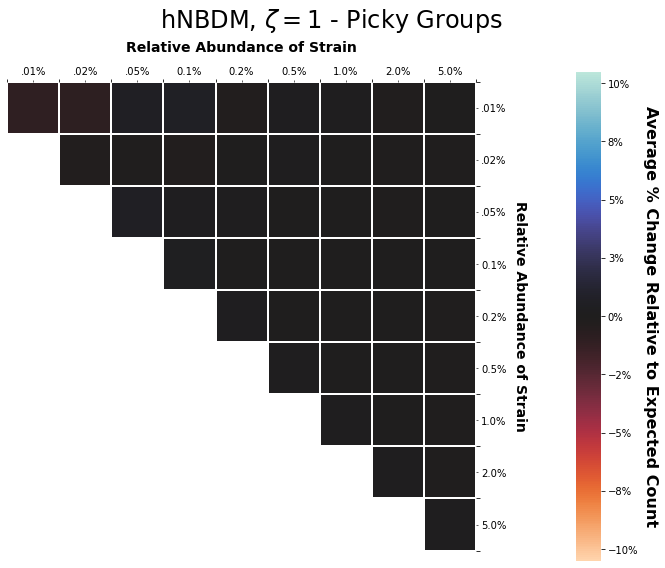

In [16]:
plot_stuff(avg_grouped_hNBDM_1_pct_diffs, 'hNBDM, $\zeta=1$ - Picky Groups')

## hPoDM $\zeta_C=1$

In [17]:
avg_grouped_hPoDM_1_pct_diffs = get_avg_grouped_pct_diffs(hPoDM_1)

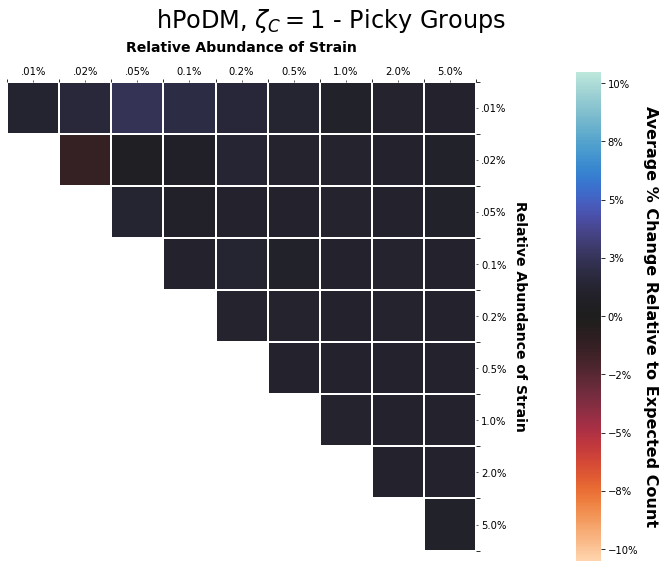

In [18]:
plot_stuff(avg_grouped_hPoDM_1_pct_diffs, 'hPoDM, $\zeta_C=1$ - Picky Groups')

## hExhNBDM

In [19]:
avg_grouped_hExhNBDM_pct_diffs = get_avg_grouped_pct_diffs(hExhNBDM)

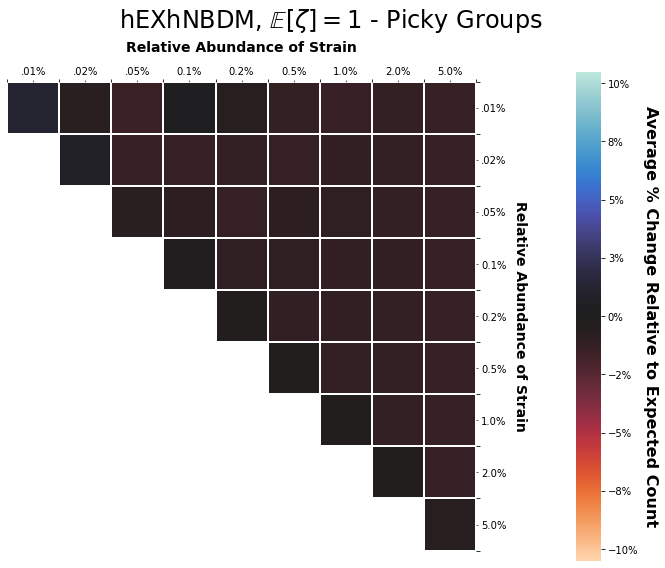

In [20]:
plot_stuff(avg_grouped_hExhNBDM_pct_diffs, 'hEXhNBDM, $\mathbb{E}[\zeta] = 1$ - Picky Groups')

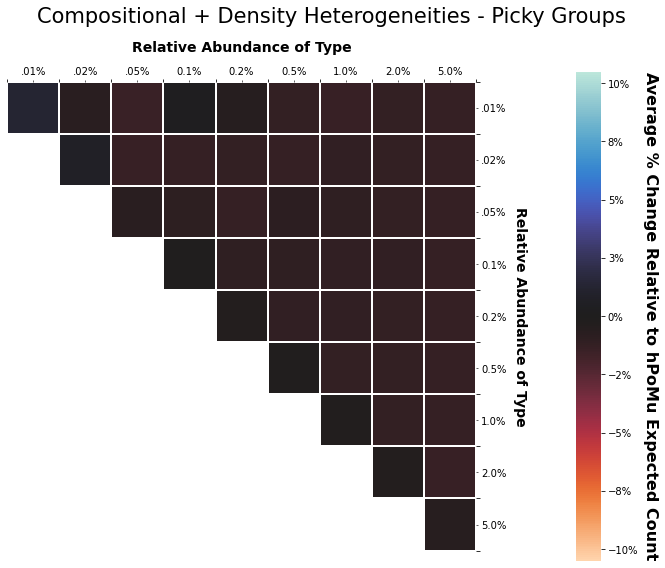

In [21]:
plot_stuff_preprint(avg_grouped_hExhNBDM_pct_diffs, 'Compositional + Density Heterogeneities - Picky Groups', 21)

## hExhPoDM

In [22]:
avg_grouped_hExhPoDM_pct_diffs = get_avg_grouped_pct_diffs(hExhPoDM)

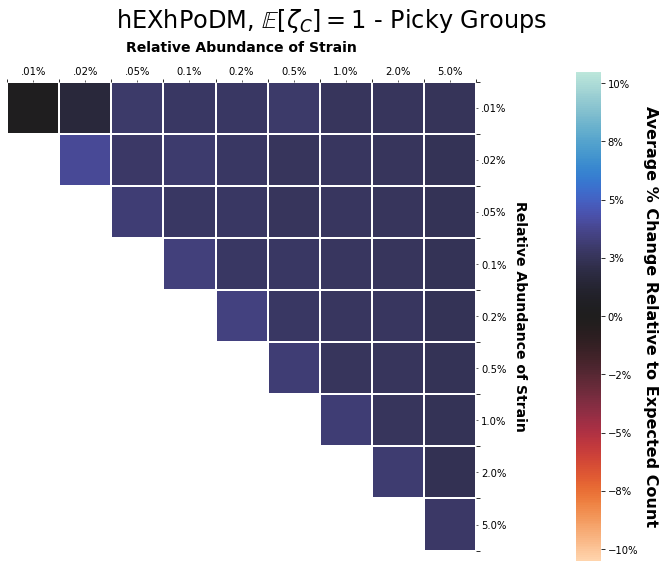

In [23]:
plot_stuff(avg_grouped_hExhPoDM_pct_diffs, 'hEXhPoDM, $\mathbb{E}[\zeta_C] = 1$ - Picky Groups')

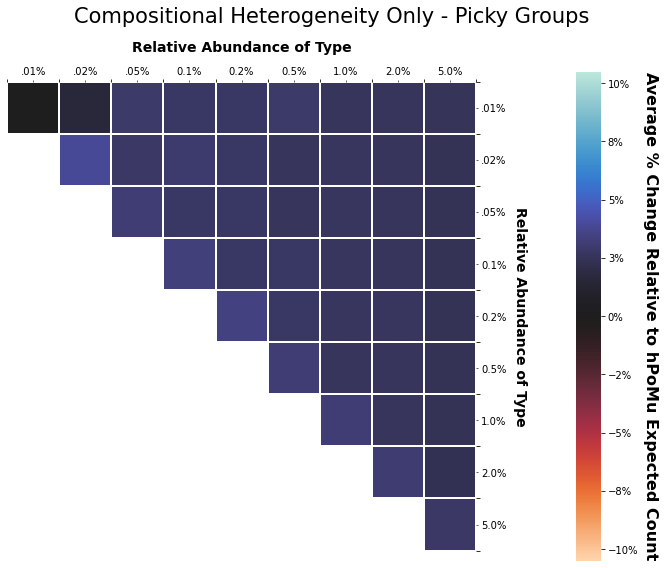

In [24]:
plot_stuff_preprint(avg_grouped_hExhPoDM_pct_diffs, 'Compositional Heterogeneity Only - Picky Groups', 21)

### Note to self

That the observed medians (not found in this notebook) tend to look broadly similar I'm guessing probably has something to do with the fact that we are comparing with the expected counts under the null (rather than the median counts under the null), so possibly reflecting more some systematic error than any useful information.